In [58]:
# install yahoo! finance api
!pip install -q yfinance

In [36]:
# import required packages
import datetime as dt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
aapl = yf.Ticker('AAPLE')
date_from = str(dt.date.today() - dt.timedelta(days=1000))
date_to = str(dt.date.today())

print(f'Downloading Apple stock data from {date_from} to {date_to}.')
data = yf.download("AAPL", start=date_from, end=date_to)

[*********************100%***********************]  1 of 1 completed


In [41]:
# view data 
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-08,113.949997,118.989998,112.680000,112.820000,110.966591,231366600
2020-09-09,117.260002,119.139999,115.260002,117.320000,115.392654,176940500
2020-09-10,120.360001,120.500000,112.500000,113.489998,111.625572,182274400
2020-09-11,114.570000,115.230003,110.000000,112.000000,110.160049,180860300
2020-09-14,114.720001,115.930000,112.800003,115.360001,113.464867,140150100


In [10]:
# index 521 days of Apple stock data
data = data.iloc[:521, :]
print(data.shape)

(521, 6)


In [32]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

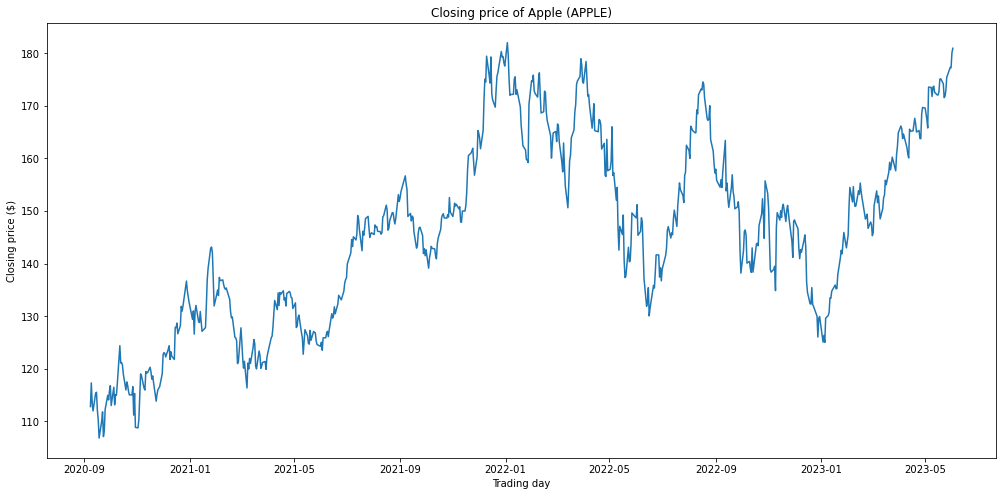

In [42]:
plt.figure(figsize=(17, 8))
plt.plot(data['Close'])
plt.title('Closing price of Apple (APPLE)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

In [34]:
def create_df(data):
    
    # initialize empty list
    data.reset_index(inplace=True)
    ls = []
    
    for i in range(500):
        # create rolling window of 21 days 
         ls.append(list((data['Close'].iloc[i:i+21]).T))
        
    cols = [f'x{i}' for i in range(1, 21)] + ['y']
    
    res = pd.DataFrame(ls, columns = cols)
    res.insert(0, 'date', data['Date'])
    return res

res = create_df(data)
res

,date,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,2020-09-08,112.820000,117.320000,113.489998,112.000000,115.360001,115.540001,112.129997,110.339996,106.839996,...,107.120003,108.220001,112.279999,114.959999,114.089996,115.809998,116.790001,113.019997,116.500000,113.160004
1,2020-09-09,117.320000,113.489998,112.000000,115.360001,115.540001,112.129997,110.339996,106.839996,110.080002,...,108.220001,112.279999,114.959999,114.089996,115.809998,116.790001,113.019997,116.500000,113.160004,115.080002
2,2020-09-10,113.489998,112.000000,115.360001,115.540001,112.129997,110.339996,106.839996,110.080002,111.809998,...,112.279999,114.959999,114.089996,115.809998,116.790001,113.019997,116.500000,113.160004,115.080002,114.970001
3,2020-09-11,112.000000,115.360001,115.540001,112.129997,110.339996,106.839996,110.080002,111.809998,107.120003,...,114.959999,114.089996,115.809998,116.790001,113.019997,116.500000,113.160004,115.080002,114.970001,116.970001
4,2020-09-14,115.360001,115.540001,112.129997,110.339996,106.839996,110.080002,111.809998,107.120003,108.220001,...,114.089996,115.809998,116.790001,113.019997,116.500000,113.160004,115.080002,114.970001,116.970001,124.400002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2022-08-25,170.029999,163.619995,161.380005,158.910004,157.220001,157.960007,155.809998,154.529999,155.960007,...,163.429993,153.839996,155.309998,152.369995,150.699997,154.479996,156.899994,153.720001,152.740005,150.429993
496,2022-08-26,163.619995,161.380005,158.910004,157.220001,157.960007,155.809998,154.529999,155.960007,154.460007,...,153.839996,155.309998,152.369995,150.699997,154.479996,156.899994,153.720001,152.740005,150.429993,150.770004
497,2022-08-29,161.380005,158.910004,157.220001,157.960007,155.809998,154.529999,155.960007,154.460007,157.369995,...,155.309998,152.369995,150.699997,154.479996,156.899994,153.720001,152.740005,150.429993,150.770004,151.759995
498,2022-08-30,158.910004,157.220001,157.960007,155.809998,154.529999,155.960007,154.460007,157.369995,163.429993,...,152.369995,150.699997,154.479996,156.899994,153.720001,152.740005,150.429993,150.770004,151.759995,149.839996


In [16]:
# check to see how many ground truth labels are missing 
len(res[res['y'].isna()])

0

In [35]:
# save as csv 
res.to_csv('apple_stock.csv')